# JBI010 - Assignment 1 (2024-2025)

This Jupyter notebook contains the first assignment of the Programming (JBI010) course. It aims at practising the skills learned during the first three weeks of the course. Do not forget to analyze each task first using computational thinking before diving into its implementation—that is, identify the main elements of the problem (e.g., inputs, output, instructions) to create a program that offers a good solution. 

## Table of Contents

- [Part 1: Temperature Conversion](#Part-1:-Temperature-Conversion)
  - [Task 1: Celsius to Fahrenheit and Back](#Task-1:-Celsius-to-Fahrenheit-and-Back-(5-Points))
  - [Task 2: Convert Temperature Data](#Task-2:-Convert-Temperature-Data-(25-Points))
  - [Task 3: Process User Input](#Task-3:-Process-User-Input-(10-Points))
  - [Task 4: Process Text File](#Task-4:-Process-Text-File-(5-Points))
  - [Task 5: Convert Valid Temperatures](#Task-5:-Convert-Valid-Temperatures-(20-Points))
  - [Task 6: Draw a Scatter Plot (Bonus)](#Task-6:-Draw-a-Scatter-Plot-(10-Bonus-Points))
- [Part 2: Dutch Weather Data](#Part-2:-Dutch-Weather-Data)
  - [Task 7: Calculate Temperature Statistics](#Task-7:-Calculate-Temperature-Statistics-(15-Points))
  - [Task 8: Find the Day with the Most Rain](#Task-8:-Find-the-Day-with-the-Most-Rain-(10-Points))


# Introduction to this template notebook

* This is a **personal** notebook. 
* Make sure you work in a **copy** of `...-template.ipynb`,
    **renamed** to `...-yourIDnr.ipynb`,
    where `yourIDnr` is your TU/e identification number.  
* In case of two authors, include both id. numbers:
    `...-firstIDnr-secondIDnr.ipynb`.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be done within your programming homework group.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python 3 code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
<br/>
NEVER write code that is needed for grading <i>outside</i> the marked blocks.
It is invisible there.
</div>

Proceed in this notebook as follows:
* **Personalize** the notebook (see below)
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following lines of code (`AUTHOR2_...` only when applicable):

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'  # when first modified, e.g. '2019-02-26'

  AUTHOR2_NAME = 'Not Applicable'
  AUTHOR2_ID_NR = 'Not Applicable'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ as strings between quotes.
1. When applicable, also copy and fill in the name and id.nr. for the second author.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [68]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Nikola Čupić'
AUTHOR_ID_NR = '2079690'
AUTHOR_DATE = '2024-09-12'

AUTHOR2_NAME = 'Petko Tepov'
AUTHOR2_ID_NR = '2114992'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Nikola Čupić', '2079690', '2024-09-12')

## Preliminaries

Run the cell below. This cell will import additional modules providing additional Python functionality.

In [69]:
import csv
from datetime import datetime
import doctest
from typing import Any, Dict, List


### AI Statement
Add a statement on how you used AI. You are  **not** allowed to use AI to generate partial or complete solutions. However, you are allowed to use AI to understand the problem. You need to honestly state what you used and how, e.g. to resolve errors, understand something better. **This statement is mandatory.** If you do not provide this information, points may be deducted from the assignment's final grade.

In [70]:
statement = """
            We decided to use Git and GitHub so that we could both work on the project simultaneously, but neither of us have much experience on it, so 
            we used ChatGPT (among other non-AI-based resources) to learn how to use the git commands and also resolve some minor issues when
            committing and pulling solutions.
            
            I, Petko, also used ChatGPT to understand how doctest works exactly because I had some difficulty with them on Task 3 and how they treat 
            input that would usually be inputted by the user.

            No AI was used to generate partial or complete solutions, generate code fragments, or test code.
            """

### Momotor Score
The score you get on Momotor **does not reflect the final grade** of your assignment.  However, it might guide you during the assignment development.

## Part 1: Temperature Conversion
Emma and Ashanti recently embarked on a relationship despite living miles apart: Emma resides in the Netherlands, while Ashanti calls Liberia home. Their geographical distance isn't the only challenge they face; they also struggle with the contrasting temperature scales used in their respective countries. In the Netherlands, Celsius is the norm, while Liberia favours Fahrenheit for temperature measurements.
To navigate this discrepancy, they began collecting temperature data from their daily routines, drawing from sources like weather reports and recipes.
Ashanti, accustomed to Fahrenheit, follows recipes using this scale. However, if Emma wishes to replicate the same dishes, she must convert the temperatures to Celsius since her oven operates on this scale. Emma, on the contrary, often relies on weather reports in Celsius to know how to dress that day. 
Yet, when she informs Ashanti it is 25 degrees Celsius outside, she is not sure whether she should wear a thick hoodie or if they can wear short pants. 
Thus, they created a file including some of the temperatures---with their corresponding scales---they want to convert. This file serves as their collaborative tool, aiding them in navigating the nuances of temperature scales and fostering their connection despite the geographical and meteorological disparities they encounter. 

The text file can be found in the `assets` folder and is named `temperature.txt`. The file contains a list of temperature conversion commands.
Its format is as follows:
* Two lines contain a conversion command, where
  * the first line defines the desired conversion. Only two values are possible: `F` and `C`. `F` states that the value should be converted from Fahrenheit to Celsius, and `C` from Celsius to Fahrenheit, and;
  * the second line contains a floating-point number with the temperature in the given scale.

For example, the first four lines of the given file are:
```
F
50
C
40
```

On the one hand, the first two lines indicate that one should convert 50 degrees Fahrenheit to Celsius. On the other hand, the last two lines request a conversion of 40 degrees Celsius to Farenheit.

You are requested to help them with the conversion of such temperatures.
Afterward, you should draw a scatter plot to represent the relationship between the two scales for the given data (see Figure 1).

<img src="assets/temperatures-scatter.png" alt="Scatter Plot" width="400"/>
<br>
<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Figure 1. Temperatures scatter plot.</span>
</div>
<br>

## Task 1: Celsius to Fahrenheit and Back (5 Points)
Before you can help Emma and Ashanti with their file, you first need to get started with a function that simply does the conversion of temperatures between scales.
Therefore, define the function `convert_temp` that converts temperatures from Celsius to Fahrenheit and Fahrenheit to Celsius.
The function receives as arguments a temperature (`float`) and a unit (`str`, being either `'F'` or `'C'`).
It then returns a list where the first item is the converted temperature and the second item is the unit of the result (either `'F'` or `'C'`).

**Notes**:
* Use the formula $1.8 c + 32$ to convert $c$ degrees Celsius to Fahrenheit.
* Use the formula $\frac{f - 32}{1.8}$ to convert $f$ degrees Fahrenheit to Celsius.
* Round the temperature to 2 decimal points. 
* For this task, you may assume that the first argument is always a positive (including 0) float and that the second argument is either `'F'` or `'C'`.
* Do not forget to write the **type hints** and **docstring** of the function.
* Include at least _four_ (4) `doctest` examples. 

**Example**:

*Input:*  
```python
convert_temp(0, 'C')
```

*Output:*  
<pre>
[32.0, 'F']
</pre>

In [71]:
#// BEGIN_TODO [convert_temp] Convert between C and F (5 points)

def convert_temp(temperature: float, unit: str) -> List[Any]:
    '''Converts the desired temperature from Fahrenheit to Celsius or the other way around. Takes two arguments:
       temperature - floating point temperature value we want to convert,
       unit - string value which can be either "F", standing for Fahrenheit, or "C", standing for celsius, specifies from which scale
              we want to convert.

        Usage examples:
        >>> convert_temp(32.0, "F")
        [0.0, 'C']
        >>> convert_temp(100, "C")
        [212.0, 'F']
        >>> convert_temp(50, "P")
        ['Incorrect unit']
        >>> convert_temp("asd", "C")
        ['Temperature is not a number']
    '''
    
    
    if unit.upper() not in ["F", "C"]:
        return ["Incorrect unit"]
    if not (type(temperature) == int or type(temperature) == float):
        return["Temperature is not a number"]
    result:List = []
    conv_temp: float = 0
    new_unit: str = ""
    if unit.upper() == "C":
        new_unit = 'F'
        conv_temp = (1.8 * temperature) + 32
        result = [conv_temp, new_unit]
    
    elif unit.upper() == "F":
        new_unit = 'C'
        conv_temp = (temperature-32)/1.8
        result = [conv_temp, new_unit]
    
    return result
        

#// END_TODO [convert_temp]

# This line is used for a manual check of your function.
convert_temp(0, 'C') 

[32.0, 'F']

In [72]:
doctest.run_docstring_examples(convert_temp, globals(), verbose=True, name='convert_temp')

Finding tests in convert_temp
Trying:
    convert_temp(32.0, "F")
Expecting:
    [0.0, 'C']
ok
Trying:
    convert_temp(100, "C")
Expecting:
    [212.0, 'F']
ok
Trying:
    convert_temp(50, "P")
Expecting:
    ['Incorrect unit']
ok
Trying:
    convert_temp("asd", "C")
Expecting:
    ['Temperature is not a number']
ok


## Task 2: Convert Temperature Data (25 Points)
It might be the case that some values in the text file are not in the desired format. The main goal of this task is to determine if the values are of a desired format or not, and to handle each case based on the input. 

To do this, define the function `convert_data` that gets a list of strings following the same format as the text file `assets/temperature.txt` (e.g. `['F', '10', 'C', 40, ...]`).
It then processes all the conversion commands (`F` for Fahrenheit to Celsius or `C` for Celsius to Fahrenheit) and _prints_ the conversion or an error message but does not return a value.

To implement this function consider the following requirements:
* Use the function `convert_temp` created in Task 1 for the temperature conversion of well-defined cases.
* Print the conversion with the following format `<old_value> <old_scale> = <new_value> <new_scale>`.
* In case of an unrecognized command `x`, print `Bad command: '<x>'`. The only allowed commands are `F` and `C`.
* In case of a bad temperature `t`, print `Bad temperature: '<t>'`. The type of temperature should be a `float`.
* In case the list does not end with a temperature, print `Missing/invalid temperature`.

**Notes**:
* All elements of the input list are a string at the beginning. You should write code that tries to convert the string value (representing the temperature value) into a float, making it a valid temperature.
* Do not forget to write the **type hints** and **docstring** of the function.
* Include at least _six_ (6) `doctest` examples.

**Example**:

*Input:*  
```python
convert_data(['F', '10', 'C', '40', '30', '20', 'S', '60', 'C', '40-', 'F'])
```

*Output:*  
<pre>
10.0 F = -12.22 C
40.0 C = 104.0 F
Bad command: '30'
Bad command: 'S'
Bad temperature: '40-'
Missing/invalid temperature
</pre>

In [73]:
#// BEGIN_TODO [convert_data] Convert temperature data (25 points)

def convert_data(data: List[str]) -> None:
    '''
    Processes a list of temperature conversion commands and temperatures,
    printing the results or error messages as necessary.

    
    Usage Example:
    >>> convert_data(['F', '32', 'C', '100'])
    32.00 F = 0.00 C
    100.00 C = 212.00 F
    
    >>> convert_data(['F', '50', 'C', 'invalid', 'C', '20'])
    50.00 F = 10.00 C
    Bad temperature: 'invalid'
    20.00 C = 68.00 F
    
    >>> convert_data(['S', '10', 'F', '100'])
    Bad command: 'S'
    100.00 F = 37.78 C
    
    >>> convert_data(['C', '100', 'X', '20'])
    100.00 C = 212.00 F
    Bad command: 'X'
    
    >>> convert_data(['C', '20-', 'F', '32'])
    Bad temperature: '20-'
    32.00 F = 0.00 C
    
    >>> convert_data(['C', '30', 'F'])
    30.00 C = 86.00 F
    Missing/invalid temperature
    
    '''

    i: int = 0
    while i < len(data):
        if i + 1 >= len(data):
            print("Missing/invalid temperature")
            break

        command: str = data[i].upper()
        temp_str: str = data[i + 1]

        
        if command not in ['F', 'C']:
            print(f"Bad command: '{command}'")
            i += 2  
            continue

        try:
            temp = float(temp_str)
        except ValueError:
            print(f"Bad temperature: '{temp_str}'")
            i += 2 
            continue

        result: List = convert_temp(temp, command)
        if result[0] == "Incorrect unit":  
            print(f"Bad command: '{command}'")
        elif result[0] == "Temperature is not a number": 
            print(f"Bad temperature: '{temp_str}'")
        else:
            print(f"{temp:.2f} {command} = {result[0]:.2f} {result[1]}")

        i += 2 



#// END_TODO [convert_data]
        
convert_data(['F', '10', 'C', '40', '30', '20', 'S', '60', 'C', '40-', 'F'])

10.00 F = -12.22 C
40.00 C = 104.00 F
Bad command: '30'
Bad command: 'S'
Bad temperature: '40-'
Missing/invalid temperature


In [74]:
doctest.run_docstring_examples(convert_data, globals(), verbose=True, name='convert_data')

Finding tests in convert_data
Trying:
    convert_data(['F', '32', 'C', '100'])
Expecting:
    32.00 F = 0.00 C
    100.00 C = 212.00 F
ok
Trying:
    convert_data(['F', '50', 'C', 'invalid', 'C', '20'])
Expecting:
    50.00 F = 10.00 C
    Bad temperature: 'invalid'
    20.00 C = 68.00 F
ok
Trying:
    convert_data(['S', '10', 'F', '100'])
Expecting:
    Bad command: 'S'
    100.00 F = 37.78 C
ok
Trying:
    convert_data(['C', '100', 'X', '20'])
Expecting:
    100.00 C = 212.00 F
    Bad command: 'X'
ok
Trying:
    convert_data(['C', '20-', 'F', '32'])
Expecting:
    Bad temperature: '20-'
    32.00 F = 0.00 C
ok
Trying:
    convert_data(['C', '30', 'F'])
Expecting:
    30.00 C = 86.00 F
    Missing/invalid temperature
ok


## Task 3: Process User Input (10 Points)

Now, we want to let Emma and Ashanti interactively insert a temperature conversion value and command as a **string input**. 
The format of each string input should be as follows:
* The input contains a **scale** (`F` for Fahrenheit and `C` for Celsius) followed by a **space** (`' '`),
* and a **temperature** as a floating-point number.
* The input can contain more than one scale and temperature.

For example, a correct string input is `F 50`, `C 20`, or `C 30 F 60 C 8`. However, your code should also work for incorrect string inputs. Examples of incorrect string inputs are `S 50`, `C `, or ` ` (empty input).

Define the function `process_input_value` that reads each string input interactively, splits the input based on the space, and puts all parts in a list. Then, this list is converted using the function `convert_data` created in Task 2.

Afterward, you need to write some code **outside the function** that asks the user for input and calls the function `process_input_value`. Make sure that the program is terminated if the user input is `q` or `quit`. 

* The program processes the data and _prints_ (without returning a value) the result using the same printing format as Task 2.
* To implement this function consider the following requirements:
    * use the previously defined `process_input_value`, and
    * in case of an empty string, print "Missing temperature" and, on a new line, print "Missing command". 

**Notes**:
* We will test your program with multiple and diverse input values.
* Do not forget to write the **type hints** and **docstring** of the function.
* Include at least _four_ (4) `doctest` examples. 

**Examples**:

*Input:*  
```python
process_input_value('C 20') 
```

*Output:*  
<pre>
 20.0 C = 68.0 F
</pre>

*Input:* 
```python
process_input_value('C 30 F 60 C 8')
```

*Output:*  
<pre>
 30.0 C = 86.0 F
 60.0 F = 15.56 C
 8.0 C = 46.4 F
</pre>

*Input:*  
```python
process_input_value('S 50')
```

*Output:*  
<pre>
Bad command: 'S'
</pre>

*Input:*  
```python
process_input_value('C ')
```

*Output:*  
<pre>
 Missing/invalid temperature
</pre>

*Input:*  
```python
process_input_value('') # no input
```

*Output:*  
<pre>
 Missing temperature
 Missing command
</pre>



In [75]:
#// BEGIN_TODO [process_input_value] Convert temperature input data (10 points)

def process_input_value(user_input: str) -> None:
    """
    Processes a string of temperature conversion input, checks its validity, 
    and prints the conversion results using convert_data.

    Examples:

    >>> process_input_value('C 20')
    20.00 C = 68.00 F

    >>> process_input_value('C 30 F 60 C 8')
    30.00 C = 86.00 F
    60.00 F = 15.56 C
    8.00 C = 46.40 F
    
    >>> process_input_value('S 50')
    Bad command: 'S'

    >>> process_input_value('C ')
    Missing/invalid temperature

    >>> process_input_value('')
    Missing temperature
    Missing command

    >>> process_input_value('F -40 C 100')
    -40.00 F = -40.00 C
    100.00 C = 212.00 F
    """
    
    input_list:List = user_input.strip().split()
    if not input_list:
        print("Missing temperature")
        print("Missing command")
        return

    if len(input_list) % 2 != 0:
        print("Missing/invalid temperature")
        return

    i: int = 0
    while i < len(input_list):
        command: str = input_list[i].upper()
        if command not in ['F', 'C']:
            print(f"Bad command: '{command}'")
            i += 2  # Skip the invalid pair
            continue

        try:
            temp = input_list[i + 1]
        except IndexError:
            print("Missing/invalid temperature")
            break
    
        convert_data([command, temp])
        i += 2

while True:
    user_input = input("Enter temperature conversion (or 'q' to quit): ").strip()

    if user_input.lower() in ['q', 'quit']:
        break

    process_input_value(user_input)

#// END_TODO [process_input_value]

20.00 C = 68.00 F
32.00 F = 0.00 C


In [76]:
doctest.run_docstring_examples(process_input_value, globals(), verbose=True, name='process_input_value')

Finding tests in process_input_value
Trying:
    process_input_value('C 20')
Expecting:
    20.00 C = 68.00 F
ok
Trying:
    process_input_value('C 30 F 60 C 8')
Expecting:
    30.00 C = 86.00 F
    60.00 F = 15.56 C
    8.00 C = 46.40 F
ok
Trying:
    process_input_value('S 50')
Expecting:
    Bad command: 'S'
ok
Trying:
    process_input_value('C ')
Expecting:
    Missing/invalid temperature
ok
Trying:
    process_input_value('')
Expecting:
    Missing temperature
    Missing command
ok
Trying:
    process_input_value('F -40 C 100')
Expecting:
    -40.00 F = -40.00 C
    100.00 C = 212.00 F
ok


## Task 4: Process Text File (5 Points)

Now that we have created a function to convert temperatures between Celsius and Fahrenheit and vice versa, we can continue by loading the `temperature.txt` containing the temperatures that Emma and Ashanti would like to convert. 
To do this, define the function `read_dataset` that:
* Takes a file as input,
* opens the text file,
* reads it line by line and strips any leading and trailing _whitespace_ from all its lines,
* then appends the line to a list, named `all_data`, 
* and returns the list `all_data`.

Then, outside of the function, use the output of the `read_dataset` function to convert the data using the `convert_data` function created in Task 2.

**Notes**: 
* Your code must work for different file names. Thus, do not code `read_dataset('assets/temperature.txt')`, but, for example,  `read_dataset(file_name)`.
* Do not forget to write the **type hints** and **docstring** of the function.
* No **doctest** is required.

**Example**:

*Output of `read_dataset`:*  
```python
['F', '50', 'C','40', 'F', '40-', 'C', '20', '', '40', 'F', '0.0', 'C', '-32', 
 'H', '50', 'F', '104', '', '','F', '15', '30', 'C', 'C', '100']
```

*Output of cell:*  
<pre>
50.0 F =    10.0 C
40.0 C =   104.0 F
Bad temperature: '40-'
20.0 C =    68.0 F
Bad command: ''
0.0 F =   -17.8 C
-32.0 C =   -25.6 F
Bad command: 'H'
104.0 F =    40.0 C
Bad command: ''
Bad temperature: ''
15.0 F =    -9.4 C
Bad command: '30'
Bad temperature: 'C'
100.0 C =   212.0 F
</pre>

In [77]:
FILE_NAME = 'assets/temperature.txt'

#// BEGIN_TODO [read_data] Process commands in text file (5 points)

def read_dataset(file_path: str) -> List[str]:
    with open(file_path, 'r') as f:
        all_data: List = []
        for line in f.readlines():
            
            all_data.append(line.strip())

    return all_data
#print(read_dataset(FILE_NAME))

convert_data(read_dataset(FILE_NAME))
#// END_TODO [read_data]

50.00 F = 10.00 C
40.00 C = 104.00 F
Bad temperature: '40-'
20.00 C = 68.00 F
Bad command: ''
0.00 F = -17.78 C
-32.00 C = -25.60 F
Bad command: 'H'
104.00 F = 40.00 C
Bad command: ''
15.00 F = -9.44 C
Bad command: '30'
100.00 C = 212.00 F


## Task 5: Convert Valid Temperatures (20 Points)
Now, that Emma and Ashanti have read their text file, you will help them to actually use it. 

First, define the function `create_valid_data`, which: 
* takes a list in the format of the output of `read_dataset` defined in Task 4 as an argument, 
* removes all invalid temperatures and commands, and 
* return a list called `valid_data`, including all valid temperatures and commands.

Second, define the function called `convert_valid_data`, that:
* takes a list in the format of the output of `create_valid_data` as an argument,
* uses the function `convert_temp` for the temperature conversion of the temperatures in the list `valid_data`, and
* returns a list called `converted_data`, including all converted temperatures and their units (i.e., `'F'` or `'C'`).

**NoteS**: 
* Do not forget to write the **type hints** and **docstring** of the function.
* No **doctest** is required.

**Example**:

*Input for `create_valid_data`:*  
```python
['F', '50', 'C', '40', 'F', '40-', 'C', '20', '', '40', 'F', '0.0', 'C', '-32', 'H', '50', 'F', '104', '', '', 'F', '15', '30', 'C', 'C', '100']
```

*Output of `create_valid_data`/Input for `convert_valid_data`:*  
```python
['F', 50.0, 'C', 40.0, 'C', 20.0, 'F', 0.0, 'C', -32.0, 'F', 104.0, 'F', 15.0, 'C', 100.0]
```

*Output of `convert_valid_data`:*  
```python
['C', 10.0, 'F', 104.0, 'F', 68.0, 'C', -17.78, 'F', -25.6, 'C', 40.0, 'C', -9.44, 'F', 212.0]
```

In [78]:
#// BEGIN_TODO [valid_data] List all valid and converted data (20 points)

def is_float(value:str) -> bool:
    """Checks whether a string can be transformed into a float"""
    try:
        float(value)
        return True
    except ValueError:
        return False


def create_valid_data(data_list: List[str]) -> List[Any]:
    """Takes a data set in form of a list of temperatures and returns all the data which is correct in the form of a new list.
       Data is valid if the temperature is either in Fahrenheit (F) or Celsius (C) and the number is correct.
    """
    valid_data: List[Any] = []
    for i, elem in enumerate(data_list):
        if(elem.upper() in ('F', 'C')):
            if(is_float(data_list[i + 1])):
                valid_data.append(elem)
                valid_data.append(float(data_list[i+1]))
    return valid_data

def convert_valid_data(valid_data:List[Any]) -> List[Any]:
    """Takes an input of VALID temperature data and returns a list of converted data (From fahrenheit to celsius and vice versa)"""
    converted_data: List[Any] = []
    for i, elem in enumerate(valid_data):
        if type(elem) == str:
            valid_temp: List = convert_temp(valid_data[i+1], elem)
            converted_data.append(valid_temp[-1])
            converted_data.append(round(valid_temp[0],2))
        else:
            continue
    return converted_data

#// END_TODO [valid_data]

all_data = read_dataset(FILE_NAME)
valid_data = create_valid_data(all_data)
converted_data = convert_valid_data(valid_data)
print(converted_data)

['C', 10.0, 'F', 104.0, 'F', 68.0, 'C', -17.78, 'F', -25.6, 'C', 40.0, 'C', -9.44, 'F', 212.0]


## Task 6: Draw a Scatter Plot (10 Bonus Points)
This task is optional, but you can earn 10 bonus points! Notice that you can get a maximum of 100 points for this assignment—including the bonus. For instance, if you scored 100 points for the other and you get the 10 additional points from this one, you won't get 100 + 10 points but 100. However, if you scored less in other tasks, this bonus task will increase your grade.

To help Emma and Ashanti see the correlation between the temperature units, you will create a scatter plot with the temperatures in degrees Fahrenheit on the X-axis and the temperatures in degrees Celsius on the Y-axis. 

Define a function called `draw_scatter_plot` that: 
* takes the output of the functions `create_valid_data` and `convert_valid_data` as two arguments, and
* draws a scatter plot, in which the X-axis represents all values in degrees Fahrenheit and the Y-axis represents all values in degrees Celsius.


**Notes**:
* You should use the lists, `valid_data` and `converted_data` defined in Task 5 as input for the function `draw_scatter_plot` to access the list of all valid data and all converted valid data, respectively.
* To draw the scatter plot, we use the **Matplotlib** library, which has the `scatter()` method. This method needs two arrays of the same length for the X-axis and Y-axis. You can invoke the Matplotlib library functions by typing `plt.<function_name_here>()`. As this is not part of the course content, please refer to the [Matplotlib documentation](https://matplotlib.org/stable/index.html).
* Give the plot a title. 
* Label both the X-axis and Y-axis.
* Do not forget to write the **type hints** and **docstring** of the function.
* No **doctest** is required.
  

**Example**:

*Input:*  
```python
scatter_plot(create_valid_data, convert_valid_data)
```

*Output of the cell:*  
<pre>
<img src="assets/temperatures-scatter.png" alt="Scatter Plot" width="400"/>
<br>
<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Figure 2. Temperatures scatter plot.</span>
</div>
<br>
</pre>

*(The function does not return a value, but should draw a plot within your notebook similar to when you use `print`.)*

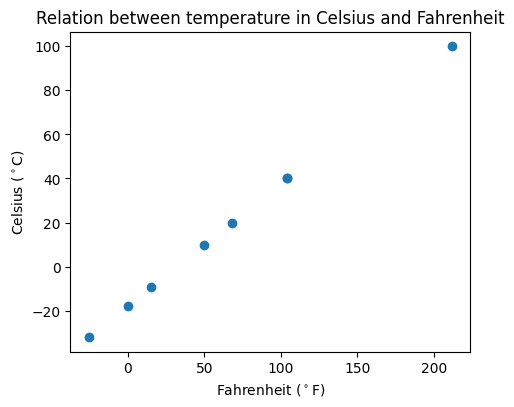

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#// BEGIN_TODO [scatter_plot] Drawing scatter plot (10 points)

def draw_scatter_plot(data_b_conv: List, data_a_conv:List) -> None:
    """Draws a scatter plot showing the relation between Fahrenheit(x-axis) and Celsius(y-axis).
       The data used is formed in the previous exercises and is here used as two lists: one of the temperatures
       given before conversion, one of the converted temperatures.

       Function first creates the apropriate lists of fahrenheit and celsius temperature values, where the values
       on the same index in the list represent the same temperature in each respective scale.

       After that, the scatter plot is drawn using these two lists (we first convert them to numpy arrays).
    """
    #Form new lists from the given ones where we just couple the scale values (C/F) with the temperature (number)
    coupled_list_b: List = [(data_b_conv[i],data_b_conv[i+1]) for i in range(len(data_b_conv)-1) if i%2 == 0]
    coupled_list_a: List = [(data_a_conv[i],data_a_conv[i+1]) for i in range(len(data_a_conv)-1) if i%2 == 0]

    fahrenheit_list: List[float] = []
    celsius_list: List[float] = []
    
    #We use zip to put together the same values together (et C 50 = F 10), and then iterate through each pair
    for elems in list(zip(coupled_list_b, coupled_list_a)):

        #Iterate through each touple and add the temperatures to their respective lists based on the scale (celsius of fahrenheit)
        for j in elems:
            if j[0] == 'F':
                fahrenheit_list.append(j[1])
            elif j[0] == 'C':
                celsius_list.append(j[1])
            else:
                continue
    
    #The result of this is that we now have two lists: one with temperatures in fahrenheit, and one in celsius.
    #Values on the same index in these lists are the same temperature just in different scales, giving us lists that we can use to properly plot data

    #Creating the figure and plotting the data
    fig = plt.figure(figsize=(8,4), dpi=100)
    axes_1 = fig.add_axes((0.1,0.1,0.5,0.8))
    
    axes_1.set_title("Relation between temperature in Celsius and Fahrenheit")
    axes_1.set_xlabel('Fahrenheit ($^\circ$F)')
    axes_1.set_ylabel('Celsius ($^\circ$C)')
    axes_1.scatter(fahrenheit_list,celsius_list)
    plt.show()


#// END_TODO [scatter_plot]

draw_scatter_plot(valid_data, converted_data)


## Part 2: Dutch Weather Data

Ashanti and Emma's relationship is going well, but they do not like the long distance between them. Therefore, Ashanti is considering to move to the Netherlands. Before he does that, he would like to get some insights into the Dutch weather data. To this end, we will use data from the Royal Netherlands Meteorological Institute (KNMI). They have downloaded the data from the weather station in Eindhoven for the year 2022. The variables of the dataset and their corresponding descriptions are denoted in the following table. The data is already read and stored in the shape of a list of dictionaries for you. Each dictionary represents weather data for a particular date and hour. Every dictionary has the variable names (in the table below) as keys and the value corresponds to an observation for a particular data and hour. In the following tasks, you will help Ashanti to find insights into the Dutch weather data.

| Variable                             | Type | Description                                                                     |
| ------------------------------------- | ---- | ------------------------------------------------------------------------------- |
| Date                                  | Datetime  | Date of observation                                                                           |
| Hour                                  | int  | Hour of observation                                                                          |
| Mean Wind Direction                   | int  | Mean wind direction during the 10-minute period preceding the time of observation |
| Hourly Mean Wind Speed (m/s)          | float  | Hourly mean wind speed in m/s                                                |
| Mean Wind Speed (m/s)                 | float  | Mean wind speed during the 10-minute period preceding the time of observation in m/s |
| Maximum Wind Gust (m/s)               | float  | Maximum wind gust during the hourly division in m/s                          |
| Temperature (° Celsius)         | float  | Temperature at 1.50 m at the time of observation in degrees Celsius         |
| Dew Point Temperature (° Celsius)| float  | Dew point temperature at 1.50 m at the time of observation in degrees Celsius |
| Sunshine Duration (0.1 hours)          | int  | Sunshine duration during the hourly division in 0.1 hour                         |
| Global Radiation (J/cm2) | int | Global radiation during the hourly division in $J/cm^2$|
| Precipitation Duration (0.1 hours)     | int  | Precipitation duration during the hourly division in 0.1 hour                     |
| Hourly Precipitation Amount (mm)      | float  | Hourly precipitation amount in mm                                            |
| Air Pressure (hPa)                    | float  | Air pressure reduced to mean sea level at the time of observation in hPa    |
| Horizontal Visibility                | int  | Horizontal visibility at the time of observation                                |
| Cloud Cover (octants)                 | object  | Cloud cover at the time of observation                                          |
| Relative Atmospheric Humidity (\%)     | int  | Relative atmospheric humidity at 1.50 m at the time of observation              |
| Indicator Present Weather Code        | int  | Indicator present weather code                                                  |
| Fog                                   | int  | Fog occurrence (0 = no, 1 = yes)                                                |
| Rainfall                              | int  | Rainfall occurrence (0 = no, 1 = yes)                                           |
| Snow                                  | int  | Snow occurrence (0 = no, 1 = yes)                                               |
| Thunder                               | int  | Thunder occurrence (0 = no, 1 = yes)                                            |
| Ice Formation                         | int  | Ice formation occurrence (0 = no, 1 = yes)                                      |


In [80]:
#DO NOT CHANGE THIS CODE
def read_dataset(data_path: str) -> List[Dict[str, Any]]:
    """
    Reads in data from the file, cleans it up, and returns it as a
    list of dictionaries.
    :param data_path: the path to the CSV file
    :returns: list of dictionaries of the prepared data.
    """
    result = list()

    float_columns = ["Hourly Mean Wind Speed (m/s)", "Mean Wind Speed (m/s)",
                        "Maximum Wind Gust (m/s)", "Temperature (degrees Celsius)",
                        "Dew Point Temperature (degrees Celsius)",
                        "Hourly Precipitation Amount (mm)", "Air Pressure (hPa)"
                        ]
    
    integer_columns = ["Hour", "Mean Wind Direction",
                       "Global Radiation (J/cm2)", "Precipitation Duration (0.1 hour)",
                       "Horizontal Visibility", "Relative Atmospheric Humidity (%)",
                       "Indicator Present Weather Code", "Fog", "Rainfall", "Snow", 
                       "Thunder", "Ice Formation"]
    
    with open(data_path) as csv_file:
        reader = csv.DictReader(csv_file)

        for inrow in reader:
            outrow = dict()

            for field in reader.fieldnames:
                if "Date" in field:
                    outrow[field] = datetime.strptime(inrow[field], '%Y-%m-%d')
                elif field in float_columns:
                    outrow[field] = float(inrow[field])
                elif field in integer_columns:
                    outrow[field] = int(inrow[field]) if inrow[field].strip() else None
                else:
                    outrow[field] = inrow[field]
            result.append(outrow)

    return result

weather_data = read_dataset("assets/weather_data.csv")

## Task 7: Calculate Temperature Statistics (20 Points)
Ashanti wants to know better what weather to expect at certain points in time. In this task, the mean temperature given a timeframe is computed. To this end, create two functions.

First, define the function `validate_date` that validates the input parameters given to the function by the user. It receives as arguments a month (`int`), a start hour (`int`), and an end hour (`int`) and it returns a boolean. The function should return `True` if:
* the month is a number between 1 and 12, 
* the start hour is between 1 and 24,
* the end hour is between 1 and 24, and
* the start hour is lower than the end hour.

Otherwise, the function returns `False` if one or more of the conditions above are not met.

Then, define the function `calculate_temperature_statistic` that finds the mean temperature for a month between certain hours.
It receives as arguments the `weather_data` (`List[Dict]`) variable (defined in the previous code cell), a month (`int`), a start hour (`int`), and an end hour (`int`).
It returns the mean (`float`) if there is at least one observation or measurement in the given timeframe. 
Else it returns `-1`.

 **Notes**:
* You can extract the month from a datetime object by adding `.month` after it.
* The column name of temperature is `Temperature (degrees Celsius)`
* In your calculations, you should consider the start hour up to (but not including) the end hour. So, if the start hour is 6 and the end hour is 8, you should only consider the hours 6 and 7. 
* Make sure that a division by zero does not occur.
* Round the mean temperature to 1 decimal point.
* Do not forget to write the **type hints** and **docstring** of the function.
* Include at least _four_ (4) `doctest` examples **per function**.

**Example**:

*Input:*  
```python
calculate_temperature_statistic(weather, 8, 12, 15)
```

*Output:*  
<pre>
25.9
</pre>


In [81]:
#// BEGIN_TODO [avg_temp] Find average temperature (15 points)

def validate_date(month: int, start_hour: int, end_hour: int) -> bool:
    """
    Validates the input parameters: month, start_hour, and end_hour. Returns a bool, if the inputs are valid True, otherwise false.
    
    Examples:
        >>> validate_date(8, 12, 15)
        True
        >>> validate_date(13, 12, 15)
        False
        >>> validate_date(8, 25, 15)
        False
        >>> validate_date(8, 15, 12)
        False
    """
    
    if not (1 <= month <= 12):
        return False
    if not (1 <= start_hour <= 24 and 1 <= end_hour <= 24):
        return False
    if start_hour >= end_hour:
        return False
    return True

def calculate_mean_temperature(weather_data: List[Dict], month: int, start_hour: int, end_hour: int) -> float:
    """
    Calculate the mean temperature for a specific month and time range. Takes weather_data (a list of containing dates and their coresponding temps), month,
    start_hour (inclusive), end_hour (not inclusive). The last three get validated by validate_date. The function returns a float of the mean temp for the 
    given time frame, or -1 if no data is available.
    
    Examples:
        >>> weather_data = [{'Date': datetime(2023, 8, 12, 13, 0), 'Temperature (degrees Celsius)': 26.3}, {'Date': datetime(2023, 8, 12, 14, 0), 'Temperature (degrees Celsius)': 27.2}]
        >>> calculate_mean_temperature(weather_data, 8, 12, 15)
        26.8
        >>> weather_data = [{'Date': datetime(2023, 7, 12, 12, 0), 'Temperature (degrees Celsius)': 30.1}]
        >>> calculate_mean_temperature(weather_data, 8, 12, 15)
        -1.0
        >>> weather_data = [{'Date': datetime(2023, 8, 12, 11, 0), 'Temperature (degrees Celsius)': 20.0}]
        >>> calculate_mean_temperature(weather_data, 8, 12, 15)
        -1.0
        >>> weather_data = []
        >>> calculate_mean_temperature(weather_data, 8, 12, 15)
        -1.0
    """
    
    if not validate_date(month, start_hour, end_hour):
        return -1.0
    
    valid_temperatures: List = [
        observation['Temperature (degrees Celsius)']
        for observation in weather_data
        if observation['Date'].month == month and start_hour <= observation['Date'].hour < end_hour
    ]
    
    if not valid_temperatures:
        return -1.0
    
    mean_temperature: float = sum(valid_temperatures) / len(valid_temperatures)
    return round(mean_temperature, 1)

#// END_TODO [avg_temp]
calculate_mean_temperature(weather_data, 1, 12, 17)

-1.0

In [82]:
doctest.run_docstring_examples(validate_date, globals(), verbose=True, name='validate_date')

Finding tests in validate_date
Trying:
    validate_date(8, 12, 15)
Expecting:
    True
ok
Trying:
    validate_date(13, 12, 15)
Expecting:
    False
ok
Trying:
    validate_date(8, 25, 15)
Expecting:
    False
ok
Trying:
    validate_date(8, 15, 12)
Expecting:
    False
ok


In [83]:
doctest.run_docstring_examples(calculate_mean_temperature, globals(), verbose=True, name='calculate_mean_temperature')

Finding tests in calculate_mean_temperature
Trying:
    weather_data = [{'Date': datetime(2023, 8, 12, 13, 0), 'Temperature (degrees Celsius)': 26.3}, {'Date': datetime(2023, 8, 12, 14, 0), 'Temperature (degrees Celsius)': 27.2}]
Expecting nothing
ok
Trying:
    calculate_mean_temperature(weather_data, 8, 12, 15)
Expecting:
    26.8
ok
Trying:
    weather_data = [{'Date': datetime(2023, 7, 12, 12, 0), 'Temperature (degrees Celsius)': 30.1}]
Expecting nothing
ok
Trying:
    calculate_mean_temperature(weather_data, 8, 12, 15)
Expecting:
    -1.0
ok
Trying:
    weather_data = [{'Date': datetime(2023, 8, 12, 11, 0), 'Temperature (degrees Celsius)': 20.0}]
Expecting nothing
ok
Trying:
    calculate_mean_temperature(weather_data, 8, 12, 15)
Expecting:
    -1.0
ok
Trying:
    weather_data = []
Expecting nothing
ok
Trying:
    calculate_mean_temperature(weather_data, 8, 12, 15)
Expecting:
    -1.0
ok


## Task 8: Find the Day with the Most Rain (15 Points)
Ashanti would also like to gain more insights into the precipitation amount in 2022. To help them, define the function `find_day_with_most_rain` that finds the day in 2022 with the maximum precipitation amount. It receives the `weather_data` (`List[Dict]`) variable as input and returns the day with the most precipitation (in the form of a `datetime` object). To this end, first create a new dictionary `rain_per_day`, within the function, that stores the rain per day. The keys of the dictionary store a datetime object and their values the total precipitation of the day. Finally, return the day which has the most precipitation. 

**Notes**:
* The column name of precipitation (rain) is `Hourly Precipitation Amount (mm)`.
* You are **not** allowed to use the built-in max-function or a lambda expression.
* Do not forget to write the **type hints** and **docstring** of the function.
* No **doctest** is required.

**Example**:

*Input:*  
```python
find_day_with_most_rain(weather)
```

*Output:*  
<pre>
datetime.datetime(2022, 6, 5, 0, 0)
</pre>

In [84]:
#// BEGIN_TODO [rain_day] Find rainiest day (10 points)

def find_day_with_most_rain(weather_data: List[Dict]) -> datetime:
    """Finds day with most precipitation based on a list of Dictionaries <weather_data>.
       First creates a dictionary with the key being the Date, and the value being the Total amount of precipitation.
       After that finds the day with most, and returns the date in datetime format.
    """

    rain_per_day: Dict[datetime : float] = {}
    amount_rain:float = 0.0
    #Iterate through all the dictionaires
    for dic in weather_data:

        #Calculates the total rainfaill in the same day by summing up all rainfaill in the 24 hour period.
        if(dic['Hour'] < 24):
            amount_rain += dic['Hourly Precipitation Amount (mm)']
        elif(dic['Hour'] == 24):
            amount_rain += dic['Hourly Precipitation Amount (mm)']
            rain_per_day[dic['Date']] = amount_rain
            amount_rain = 0
        else:
            continue
    
    #Find the maximum amount of rainfall in a day
    max_num: float = 0.0
    date_perc: datetime = None
    for key,value in rain_per_day.items():   
        if value >= max_num:       
            max_num = value
            date_perc = key
            
    return date_perc 
#// END_TODO [rain_day]

find_day_with_most_rain(weather_data)

datetime.datetime(2022, 6, 5, 0, 0)

---

## (End of Notebook)

&copy; 2024 - **TU/e** - Eindhoven University of Technology

All rights reserved. You are only allowed to use this notebook for private purposes. You are not allowed to distribute or share it with other parties.